https://en.wikipedia.org/wiki/Optical_character_recognition

Had to install windows tesseract version

In [108]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'E:\Progs\Tesseract\tesseract.exe'

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

In [145]:
True * False, True * True, False * False

(0, 1, 0)

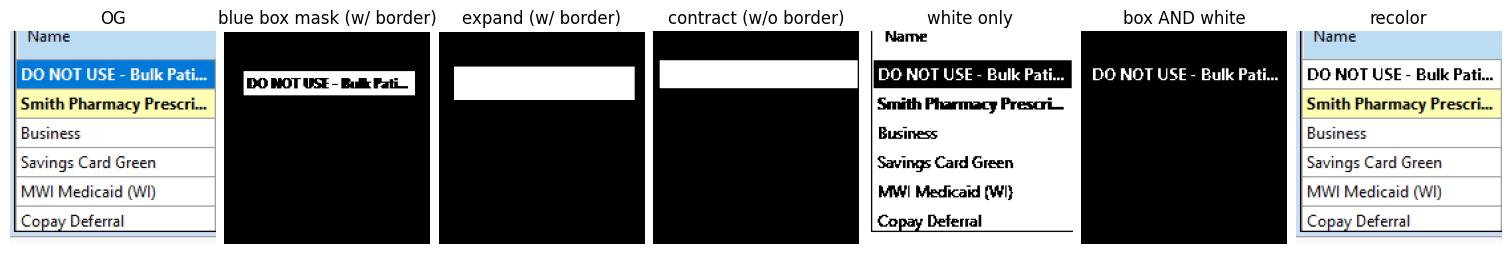

In [193]:
image = cv.imread(r'e:\relocated\Downloads\text2_tesseract.png', 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hist = [image.copy()]
titles = ['OG']
blue = np.all(image == [0, 120, 215], axis = -1).astype(np.uint8) # 0s and 1s

ks = 3
kernel = cv.getStructuringElement(shape=cv.MORPH_RECT, ksize=(ks,ks))
num_iters = 4
border_width = num_iters*ks
# when we expand we dont want to pass image borders. 
# thats why we "expand" borders. kind off.
# instead we create larger black image.
temp = np.zeros((blue.shape[0] + 2*border_width, blue.shape[1]+ 2*border_width), dtype=np.uint8)
# and copy blue region mask inside
temp[border_width:-border_width,border_width:-border_width] = blue
blue = temp
hist.append(blue.copy())
titles.append("blue box mask (w/ border)")
# get rid of text inside blue box mask
blue = cv.dilate(blue, kernel, iterations= num_iters)
hist.append(blue.copy())
titles.append("expand (w/ border)")
blue = cv.erode( blue, kernel, iterations= num_iters)
blue = blue[border_width:-border_width,border_width:-border_width]
hist.append(blue.copy())
titles.append("contract (w/o border)")
# crop border out again
# extract mask of all white-ish pixel
threshold = np.array([(150,150,150),(255,255,255)]) 
white = cv.inRange(image, *threshold).astype(bool) 
hist.append(white.copy())
titles.append("white only")
# extract pixels that are both within blue box AND are white-ish
text_in_box = white * blue   # 1*1 = 1, 1*0=0*1=0*0 = 0 fake boolean AND
hist.append(text_in_box.copy())
titles.append("box AND white")
# recolor box and inside text
img2 = image.copy()
img2[blue.astype(bool)] = [255,255,255]   # fill blue with color
img2[text_in_box.astype(bool)] = [0,0,0]  # fill text
hist.append(img2)
titles.append("recolor")
fig, ax = plt.subplots(1,len(hist), figsize = (15,4), layout='constrained')#, sharex=1, sharey=1)
for i in range(len(hist)):
    ax[i].imshow(hist[i], 'gray')
    ax[i].set_title(titles[i])


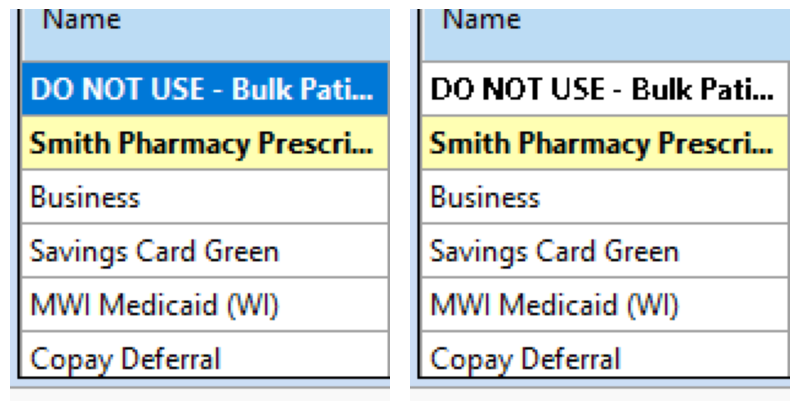

In [197]:
def recolor_blue_box(rgb_image, kernel_size = 3, num_iters = 4):
    """This function changes color of text inside blue box to black
        and changes blue box color to white"""
    image = rgb_image.copy()    # in case we dont want to change input.
    blue = np.all(image == [0, 120, 215], axis = -1).astype(np.uint8) # 0s and 1s
    kernel = cv.getStructuringElement(shape=cv.MORPH_RECT, ksize=(kernel_size,kernel_size))
    border_width = num_iters*kernel_size
    # when we expand we dont want to pass image borders. 
    # thats why we "expand" borders. kind off.
    # instead we create larger black image.
    temp = np.zeros((blue.shape[0] + 2*border_width, blue.shape[1] + 2*border_width), dtype=np.uint8)
    # and copy blue region mask inside
    temp[border_width:-border_width,border_width:-border_width] = blue
    blue = temp
    # get rid of text inside blue box mask
    blue = cv.dilate(blue, kernel, iterations= num_iters)
    blue = cv.erode( blue, kernel, iterations= num_iters)
    blue = blue[border_width:-border_width,border_width:-border_width]
    # crop border out again
    # extract mask of all white-ish pixel
    threshold = np.array([(150,150,150),(255,255,255)]) 
    white = cv.inRange(image, *threshold).astype(bool) 
    # extract pixels that are both within blue box AND are white-ish
    text_in_box = white * blue   # 1*1 = 1, 1*0=0*1=0*0 = 0 fake boolean AND
    # recolor box and inside text
    image[blue          .astype(bool)] = [255   ,255,255]   # fill blue with color
    image[text_in_box   .astype(bool)] = [0     ,0  ,0  ]  # fill text

    return image

image = cv.imread(r'e:\relocated\Downloads\text2_tesseract.png', 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

image_recolored = recolor_blue_box(image)

fig, ax = plt.subplots(1,2, figsize = (8,4), layout='constrained', sharex=1, sharey=1)
ax[0].imshow(image)
ax[1].imshow(image_recolored)

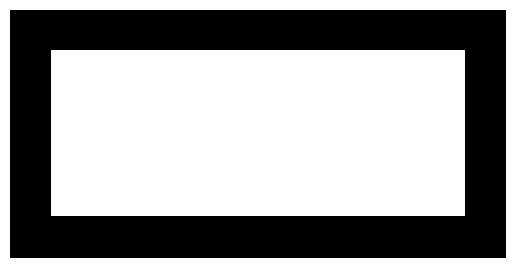

In [182]:
border_width = 5
blank = np.zeros(shape= (20 + 2 * border_width, 50 + 2 * border_width), dtype = np.uint8)
blank[border_width:-border_width, border_width:-border_width] = 255
plt.imshow(blank, 'gray');

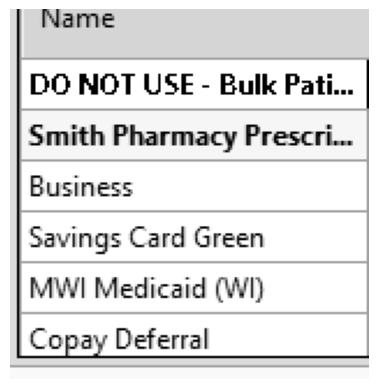

In [138]:
plt.imshow(cv.cvtColor(img2, cv.COLOR_RGB2GRAY), 'gray')

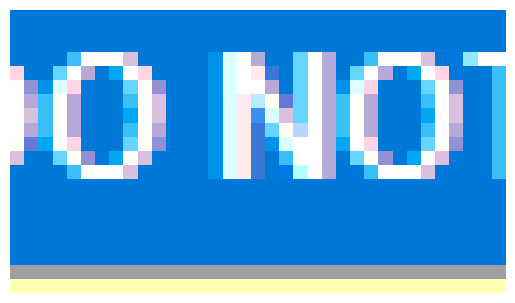

In [142]:
plt.imshow(image[25:45,15:50])

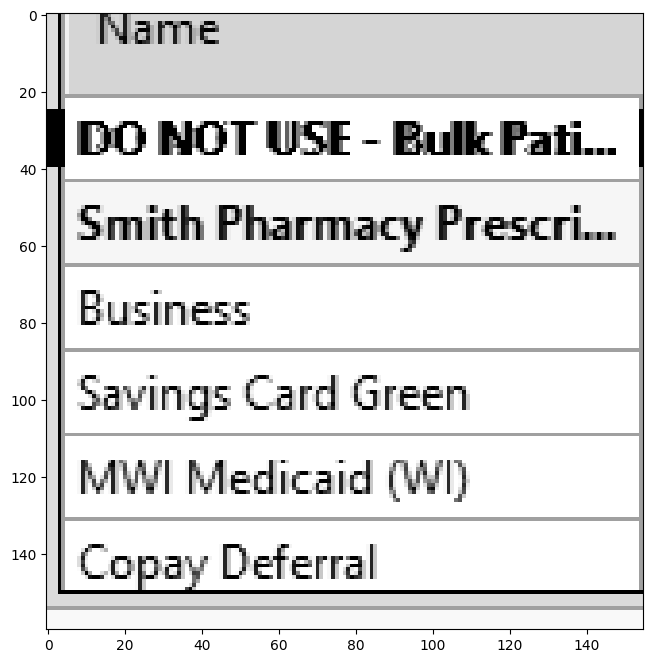

In [82]:
image = cv.imread(r'e:\relocated\Downloads\text2_tesseract.png', 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
slc = image[25:40]

plt.imshow(image[25:40])#, 'gray')
# replace black text with white
ths = np.array([(150,150,150),(255,255,255)])   # whit-ish
aa = (cv.inRange(slc, *ths)/255).astype(bool) 
image[25:40][aa] = [0,0,0]
# replace blue with white
blue = np.all(image == np.array([  0, 120, 215]), axis = -1)
image[blue] =  [255,255,255]
image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(image, 'gray')


In [84]:
def adjust_brightness(rgb_col, brightness = 1):
    c = np.array(rgb_col, dtype = np.uint8).reshape(1,1,3)
    c2 = cv.cvtColor(c, cv.COLOR_RGB2HSV)
    c2[0,0,1] *= brightness
    return cv.cvtColor(c2, cv.COLOR_HSV2RGB).reshape(3)

results = pytesseract.image_to_data(image, output_type=Output.DICT,config='--psm 3 --oem 3')
results.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [85]:
' '.join(results['text'])

'    Name                             DO NOT USE - Bull Pat         Smith Pharmacy Prescri         Business  Savings Card Green  MWI Medicaid (WI)  Copay Deferral'

# Get block bounding boxes, word bounding boxes

For blocks:
1. drop rectangle points into lists =  contour
2. get bounding box

For words:
1. draw word bounding box, colored by confidence

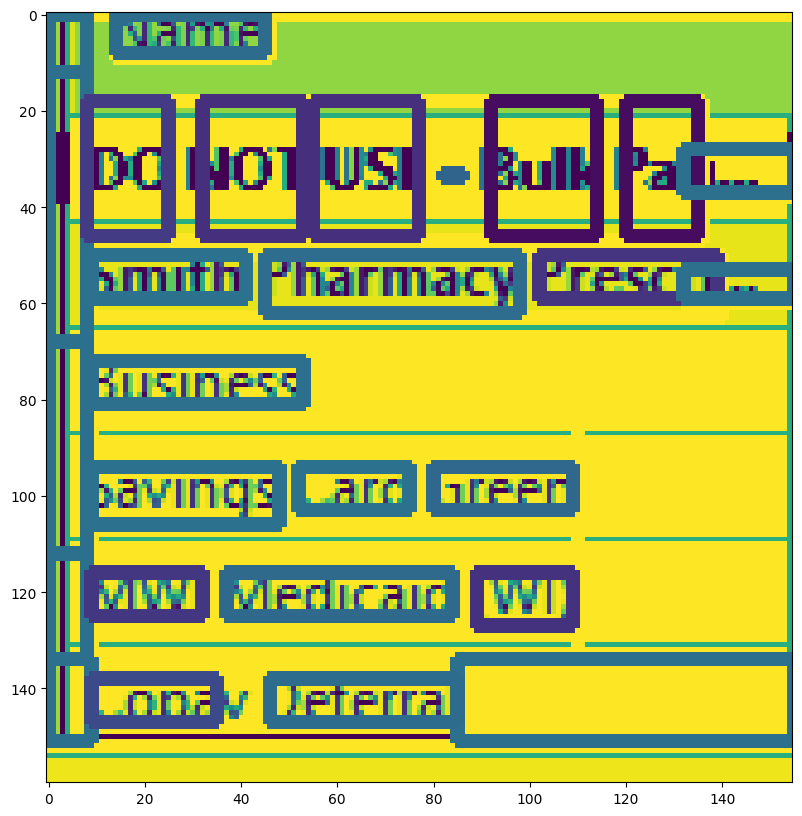

In [75]:
blocks_unique_dims = [[] for _ in range(results['block_num'][-1]+1)]

conf_thresh = 0.0
for i in range(0, len(results["text"])): 
    keys = ["left", "top", "width", "height", "block_num","conf"]
    x,y,w,h,block_num,conf = [results[key][i] for key in keys]
    if conf/100 > conf_thresh:
        blocks_unique_dims[block_num].append(np.array([x,y]))
        blocks_unique_dims[block_num].append(np.array([x+w,y+h]))

bb = [np.array(cntr, dtype=np.float32) if len(cntr)>0 else None for cntr in blocks_unique_dims]
bb = [cv.boundingRect(c) if c is not None else None for c in bb]
img2 = image.copy()

for block_num,rp in enumerate(bb):
    if rp is not None:
        x,y,w,h = bb[block_num]
        cv.rectangle(img2, 
                      (x, y), 
                      (x + w, y + h), 
                      color = (255, 0, 0),
                      thickness=2) 
        


for i in range(0, len(results["text"])): 
    keys = ["left", "top", "width", "height", "block_num","conf"]
    x,y,w,h,block_num,conf = [results[key][i] for key in keys]
    if conf/100 > conf_thresh:
        cv.rectangle(img2, 
                      (x, y), 
                      (x + w, y + h), 
                      color = adjust_brightness((0, 0, 255), conf).tolist(),
                      thickness=2) 
        
plt.figure(figsize=(10,10))
plt.imshow(img2)